In [1]:
import sympy
import math 
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import optimize

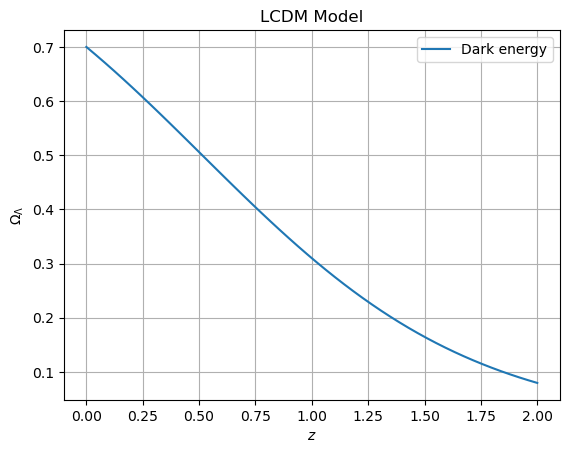

In [2]:
#Variables 
z2 = 2 
etaf = np.log(1./(1+z2))
eta = np.linspace(0, etaf, 50) #eta = ln(a)


#Gamma for each component \gamma = 1 + w 
Gl = 0 #LCDM
Gm, Gr, Gk = 1, 4/3, 2/3

#Initial conditions
Om0 = 0.3
Or0 = 0.0000
Ok0 = 0
Ol0 = 1 - Om0 - Or0 - Ok0


#Solution
def odes(x, eta):
  # for each component  
    Om,Or,Ol,Ok = x[0], x[1], x[2],x[3]

   # LCDM modols

    ode_m = 3*((Gm*Om+Gr*Or+Gl*Ol+Gk*Ok)-Gm)*Om
    ode_r = 3*((Gm*Om+Gr*Or+Gl*Ol+Gk*Ok)-Gr)*Or
    ode_l = 3*((Gm*Om+Gr*Or+Gl*Ol+Gk*Ok)-Gl)*Ol
    ode_k = 3*((Gm*Om+Gr*Or+Gl*Ol+Gk*Ok)-Gk)*Ok
    

    return [ode_m, ode_r, ode_l, ode_k]

# Initial conditions 
x0 = [Om0, Or0, Ol0, Ok0]
x_lcdm = odeint(odes,x0,eta)

Om_lcdm = x_lcdm[:,0]
Or_lcdm = x_lcdm[:,1]
Ol_lcdm= x_lcdm[:,2]
Ok_lcdm = x_lcdm[:,3]

z =np.linspace(0,2, 50)

#Ploteado densidades

plt.plot(z,x_lcdm[:,2],label='Dark energy')
plt.ylabel('$\\Omega_\Lambda$')
plt.xlabel('$z$')
plt.legend(loc='best')
plt.title("LCDM Model")
plt.grid()
plt.show()

## Tsallis entropy 
#### The Tsallis entropy can be written in compact form 
$$
S_T = \gamma A^\delta
$$ 
#### where $A \propto L^2$ is the area of the system with characteristic lenght $L$. The parameters $\gamma$ and $\delta$ under the hypothesis of equal probabilities are related to the dimensionality of the system $d$, and specifically the important one is 
$$
\delta = \frac{d}{d-1}, \, \, \text{for} \,\, d > 1.
$$
#### In the case where $\delta = 1$ and $\gamma = 2 \pi M_p^2$, with $M_p$ the Planck mass, we obtain the usual additive entropy. 
### Tsallis holographic dark energy 
#### We consider a flat homogeneous and isotropic Friedmann-Robertson-Walker universe, in this case the horizon is 
$$
\int_{x}^{ \infty} \frac{dx}{Ha} = \frac{1}{a} \left( \frac{B}{3 M^2 H^2 \Omega_{DE}} \right)^{\frac{1}{4-2\delta}}. 
$$
#### In this model the evolution of the dark energy is given by the equation 
$$
{\Omega'}_{DE} = \Omega_{DE} \left( 1 - \Omega \right) \left( 2 \delta -1 +  Q\left(1 - \Omega_{DE} \right)^{\frac{1-\delta}{2(2-\delta)}} (\Omega_{DE})^{\frac{1}{2(2-\delta)} } e^{\frac{3(1-\delta)}{2(2-\delta)}x} \right)
$$
#### where 
$$
Q = 2 (2 - \delta) \left( \frac{B}{3 M_p^2 }\right)^{\frac{1}{2(\delta - 2 )}} \left( H_0 \sqrt{\Omega_{m0}} \right)^{\frac{1-\delta}{\delta-2}}
$$
#### 

### on the other hand, notice that $x = ln(a) = ln(\frac{1}{1+z} ) = - ln(1+z)$, thus 
$$
\frac{d x}{dz} = - \frac{1}{1+z}
$$

### thus, we can rewrite the evolution of the Tsallis holographic dark energy in the form 

$$
\frac{d \Omega_{DE}}{d x} = \frac{d \Omega_{DE}}{dz} \frac{dz}{dx} = - \frac{d \Omega_{DE}}{dz} (1 + z)
$$

$$
\longrightarrow \frac{d \Omega_{DE}}{dz} = -  \frac{\Omega_{DE}}{1+z} \left( 1 - \Omega \right) \left( 2 \delta -1 +  Q\left(1 - \Omega_{DE} \right)^{\frac{1-\delta}{2(2-\delta)}} (\Omega_{DE})^{\frac{1}{2(2-\delta)} } e^{- \frac{3(1-\delta)}{2(2-\delta)}ln(1+z)} \right)

$$

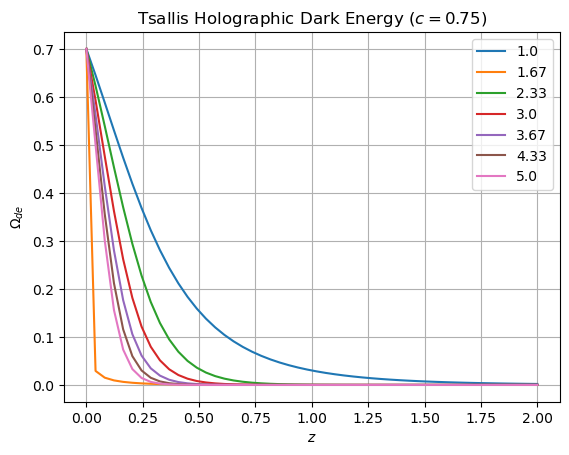

In [3]:
d  = [1.0,1.67,2.33,3.0,3.67,4.33,5.0]
H0 = 70
Om0 = 0.3
Ode_0 = 0.7
zfin = 100
xini = 0
xfin = np.log(1. / (1 + zfin))
xval = np.linspace(xini, xfin, 50)
zval = np.linspace(0,2,50)

def tsallis_model(Omega, x, d_value, c= 1):
    Q = 2*(2 - d_value)*((3*c**2 / 3) ** (1. / (2 * (d_value - 2)))) * (H0 * np.sqrt(Om0)) ** ((1 - d_value) / (d_value - 2))
    dOmega = Omega * (1 - Omega) * (
                2 * d_value - 1 + Q * ((1 - Omega) ** ((1 - d_value) / (2 * (2 - d_value)))) * (Omega ** (1. / (2 * (2 - d_value))))*np.exp(
            (3*(1 - d_value)/(2*(2 - d_value)))*x))
    return dOmega


solutions_tsallis = []
for d_value in d:
    sol = odeint(tsallis_model, Ode_0, xval, args=(d_value,))
    solutions_tsallis.append(sol)

# Reshape all solutions in solutions_tsallis
solutions_tsallis_reshaped = []
for sol in solutions_tsallis:
    solutions_tsallis_reshaped.append(sol[:, 0].reshape(-1))

# Plot each component of solutions_tsallis_reshaped against xval
for sol_reshaped in solutions_tsallis_reshaped:
    plt.plot(zval, sol_reshaped)

plt.xlabel('$z$')
plt.ylabel('$\Omega_{de}$')
plt.title('Tsallis Holographic Dark Energy ($c = 0.75$)')
plt.legend(d)
plt.grid(True)
plt.show()




In [4]:
def hub(z, Ok=0):
    Om= 0.3
    Or= 0.0001
    #Ok=0.01
    Oe= 1 - Om - Or - Ok
    H0 = 70
    
    return H0*np.sqrt( Or*(1+z)**4 + Om*(1+z)**3 + Ok*(1+z)**2 + Oe)

red_z = np.linspace(0, 2, 50)

hubz = hub(zval)

arr_hub = np.loadtxt('Hz_all.dat')
z_obs= arr_hub[:,0]
hub_obs = arr_hub[:,1]
error_obs = arr_hub[:,2]

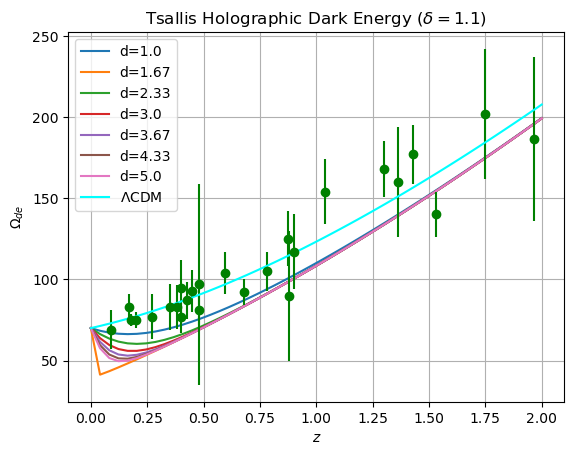

In [5]:
# Define the parameters
Om = 0.3
Or = 0.0001
Ok = 0.0
Oe = 1 - Om - Or - Ok
H0 = 70

def RHSquared_z(z, sol_ode):
    return H0*np.sqrt(( Om * (z + 1)**3)/(1 - sol_ode))

Hubble_z = []
for sol_ode in solutions_tsallis_reshaped:
    Hub = RHSquared_z(zval, sol_ode)
    Hubble_z.append(Hub)

# Plot each component H(z) for B values
for i, Hub in enumerate(Hubble_z):
    plt.plot(zval, Hub, label=f'd={d[i]}')

plt.errorbar(z_obs, hub_obs, error_obs, ls='', marker='o', color='green')
plt.plot(red_z, hubz, color='cyan', label='$\Lambda$CDM')
plt.xlabel('$z$')
plt.ylabel('$\Omega_{de}$')
plt.title('Tsallis Holographic Dark Energy ($\delta = 1.1$)')
plt.legend()
plt.grid(True)
plt.show()


## Holographic Dark Energy in modfied Barrow Cosmology 
#### Sheykhi, A., & Hamedan, M. S. (2023). Holographic Dark Energy in Modified Barrow Cosmology. Entropy, 25(4), 569. https://doi.org/10.3390/e25040569. 
#### Int his model que area law of the black hole entropy get modified 
$$
S = \left( \frac{A}{A_0} \right)^{1+\frac{\delta}{2}}
$$
#### where $A$ is the black hole horizon and $A_0$ is the Planck area. Thee exponent $\delta$ ranges as $0 \leq \delta \leq 1 $ and represents the amount of the quamtum-gravitational deformation effects. 
#### For the no non-interacting case the simensionless parameters are 
$$
\Omega_{de} = \frac{\rho_{de}}{3 M_{eff}^{2} H^{2 - \delta}}
$$
$$
\Omega_{m} = \frac{\rho_{m}}{3 M_{eff}^{2} H^{2 - \delta}}
$$
#### The evolution of the dark energy is given by the equation 
$$
{\Omega'}_{de} = \Omega_{de} \left( 1 - \Omega_{de} \right) \left( 1 + \delta + \left( 2 - \delta \right) \left(\frac{\Omega_{de}}{c^2} \right)^{\frac{1}{2\delta}} \right) 
$$

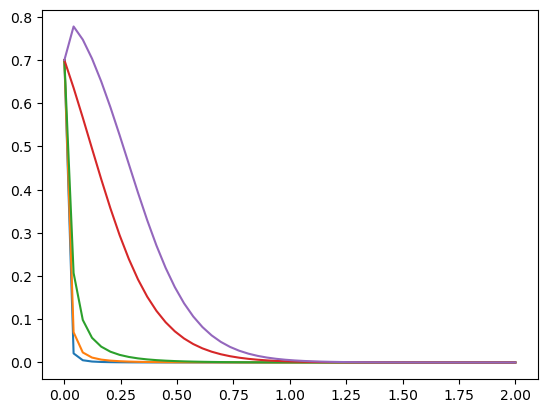

In [6]:

# Define global constants
B = [0.0,0.5,1.0,1.9,2.2]
c = 1.0

# Define the model
def barrow_model(Omega, x, B_value):
    Q = (2 - B_value)*((c**2)**(1/(B_value - 2)))*(70*np.sqrt(Om)**(B_value/(2-B_value)))
    dOmega = Omega * (1 - Omega) * (1 + B_value +   Q*((1 -Omega)**(B_value/(2*(B_value - 2))))
    *(Omega**(1/(2-B_value)))*np.exp(3*B_value*x/(2*(B_value -2))) ) 
    
    
    return dOmega  


solutions_barrow = []
for B_value in B:
    sol = odeint(barrow_model, Ode_0, xval, args=(B_value,))
    solutions_barrow.append(sol)


# Reshape all solutions in solutions_barrow
solutions_barrow_reshaped = []
for sol in solutions_barrow:
    solutions_barrow_reshaped.append(sol[:, 0].reshape(-1))

# Plot each component of solutions_barrow_reshaped against xval
for i, sol_reshaped in enumerate(solutions_barrow_reshaped):
    plt.plot(zval, sol_reshaped, label=f'B={B[i]}')






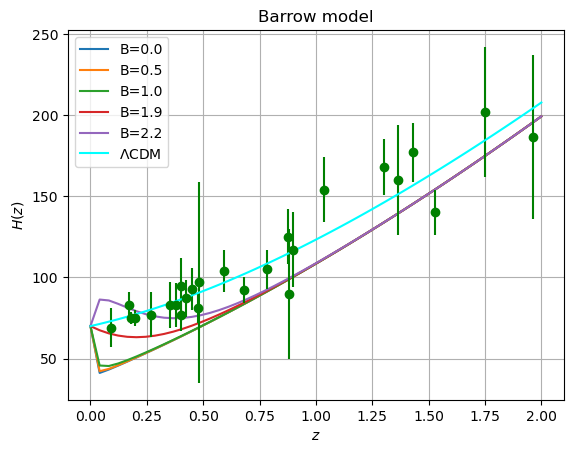

In [7]:
z_new = np.linspace(0,2,50)
def RHSquared_z_barrow(z, sol_ode):
    return H0 * np.sqrt((Or * (z + 1) ** 4 + Om * (z + 1) ** 3) / (1 - sol_ode))

Hubble_z_barrow = []
for sol_ode in solutions_barrow_reshaped:
    Hub = RHSquared_z(zval, sol_ode)
    Hubble_z_barrow.append(Hub)

# Plot each component H(z) for d values
for i, Hub in enumerate(Hubble_z_barrow):
    plt.plot(z_new, Hub, label=f'B={B[i]}')

plt.errorbar(z_obs, hub_obs, error_obs, ls='', marker='o', color='green')
plt.plot(z_new, hubz, color='cyan', label='$\Lambda$CDM')
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.title('Barrow model')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
def barrow_model1(Omega, x,B = 2.1 ):
    c1 = 1
    Q = (2 - B)*((c1)**(1/(B - 2)))*(70*np.sqrt(Om)**(B/(2-B)))
    dOmega = Omega * (1 - Omega) * (1 + B +   Q*((1 -Omega)**(B/(2*(B - 2))))
    *(Omega**(1/(2-B)))*np.exp(3*B*x/(2*(B -2))) ) 
     return dOmega  


def tsallis_model1(Omega, x, d_value=d1[0], c= 1.0):
    Q = 2 * (2 - d_value) * ((c)**(1/((d_value - 2)))) * (H0 * np.sqrt(Om0)) ** ((1 - d_value) / (d_value - 2))
    dOmega = Omega * (1 - Omega) * (
                2 * d_value - 1 + Q * ((1 - Omega) ** ((1 - d_value) / (2 * (2 - d_value)))) * (Omega**(1/(2 * (2 - d_value)))) * np.exp(
            (3 * (1 - d_value) / (2 * (2 - d_value))) * x))
    return dOmega






sol_B = odeint(barrow_model1, Ode_0, xval)

sol_B_re = sol_B.reshape(-1)



def RHSquared_z(z, sol_ode):
    return H0 * np.sqrt((Or * (z + 1) ** 4 + Om * (z + 1) ** 3) / (1 - sol_ode))

Hubble_z = RHSquared_z(zval, sol_B_re)



plt.plot(red_z,Hubble_z)
plt.errorbar(z_obs, hub_obs, error_obs, ls='', marker='o', color='green')
plt.plot(red_z, hubz, color='cyan', label='$\Lambda$CDM')
plt.xlabel('$z$')
plt.ylabel('$\Omega_{de}$')
plt.title('Tsallis Holographic Dark Energy ($\delta = 1.1$)')
plt.legend()
plt.grid(True)
plt.show()

IndentationError: unexpected indent (1654805750.py, line 6)

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.0000000000000D+00   r2 = -0.0000000000000D+00
 intdy--  t (=r1) illegal        
      in above message,  r1 = -0.2242065895241D-01
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.0000000000000D+00   r2 =  0.0000000000000D+00
 intdy--  t (=r1) illegal        
      in above message,  r1 = -0.4484131790482D-01
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.0000000000000D+00   r2 =  0.0000000000000D+00
 lsoda--  trouble from intdy. itask = i1, tout = r1  
      in above message,  i1 =         1
      in above message,  r1 = -0.4484131790482D-01


/home/alfonsozapata/anaconda3/envs/cosmodesi/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/tmp/ipykernel_151816/3395480719.py:9: RuntimeWarning: invalid value encountered in sqrt
  return H0*np.sqrt(( Om * (z + 1)**3)/(1 - sol_ode))


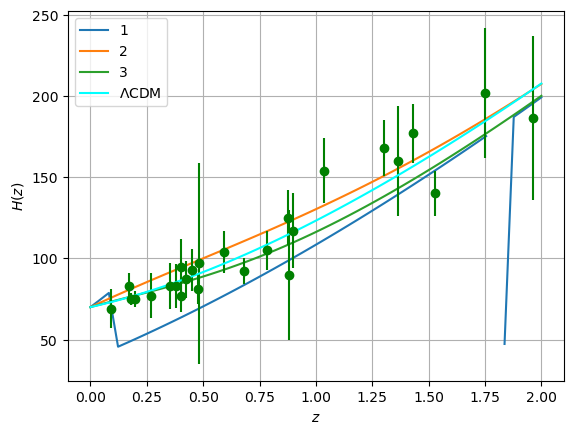

In [16]:
d1 = [1.99,2.01,3]
def tsallis_model1(Omega, x, d_value=d1[0], c= 1.0):
    Q = 2 * (2 - d_value) * ((c)**(1/((d_value - 2)))) * (H0 * np.sqrt(Om0)) ** ((1 - d_value) / (d_value - 2))
    dOmega = Omega * (1 - Omega) * (
                2 * d_value - 1 + Q * ((1 - Omega) ** ((1 - d_value) / (2 * (2 - d_value)))) * (Omega**(1/(2 * (2 - d_value)))) * np.exp(
            (3 * (1 - d_value) / (2 * (2 - d_value))) * x))
    return dOmega

def tsallis_model2(Omega, x, d_value =d1[1], c= 1.0):
    Q = 2 * (2 - d_value) * ((c)**(1/((d_value - 2)))) * (H0 * np.sqrt(Om0)) ** ((1 - d_value) / (d_value - 2))
    dOmega = Omega * (1 - Omega) * (
                2 * d_value - 1 + Q * ((1 - Omega) ** ((1 - d_value) / (2 * (2 - d_value)))) * (Omega**(1/(2 * (2 - d_value)))) * np.exp(
            (3 * (1 - d_value) / (2 * (2 - d_value))) * x))
    return dOmega

def tsallis_model3(Omega, x, d_value = d1[2], c= 1.0):
    Q = 2 * (2 - d_value) * ((c)**(1/((d_value - 2)))) * (H0 * np.sqrt(Om0)) ** ((1 - d_value) / (d_value - 2))
    dOmega = Omega * (1 - Omega) * (
                2 * d_value - 1 + Q * ((1 - Omega) ** ((1 - d_value) / (2 * (2 - d_value)))) * (Omega**(1/(2 * (2 - d_value)))) * np.exp(
            (3 * (1 - d_value) / (2 * (2 - d_value))) * x))
    return dOmega


x1 = np.linspace(0,np.log(1./(1+2)), 50)

sol_tsallis1 =odeint(tsallis_model1, Ode_0, x1)
sol_tsallis2 =odeint(tsallis_model2, Ode_0, x1)
sol_tsallis3 =odeint(tsallis_model3, Ode_0, x1)

sol_tre1 = sol_tsallis1.reshape(-1)
sol_tre2 = sol_tsallis2.reshape(-1)
sol_tre3 = sol_tsallis3.reshape(-1)



def RHSquared_z_tsallis(z, sol_ode):
    return H0 * np.sqrt((Om*(z + 1)**3)/(1 - sol_ode))

Hubble_z_tsallis1 = RHSquared_z(zval, sol_tre1)
Hubble_z_tsallis2 = RHSquared_z(zval, sol_tre2)
Hubble_z_tsallis3 = RHSquared_z(zval, sol_tre3)


plt.plot(zval,Hubble_z_tsallis1,label = '1')
plt.plot(zval,Hubble_z_tsallis2,label = '2')
plt.plot(zval,Hubble_z_tsallis3,label = '3')
plt.errorbar(z_obs, hub_obs, error_obs, ls='', marker='o', color='green')
plt.plot(zval, hubz, color='cyan', label='$\Lambda$CDM')
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.legend()
plt.grid(True)
plt.show()



/tmp/ipykernel_151816/642837137.py:3: RuntimeWarning: invalid value encountered in power
  w = (1- 2*d_value)/3 - Q/3*((Omega)**(1/(2*(2 - d_value))))*((1 - Omega)**((d_value  -1)/2*(d_value - 2)))*np.exp((3*(1 - d_value)/(d_value-2))*x)


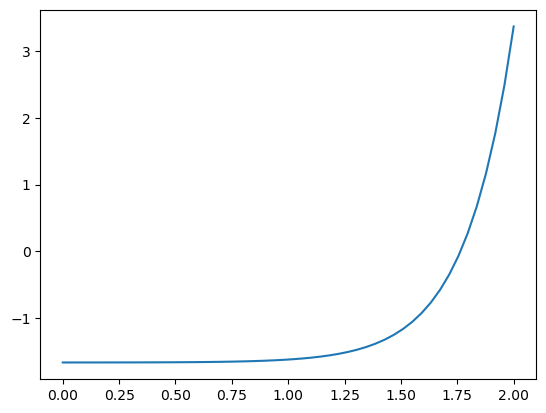

In [27]:
def Eos (Omega,x, d_value,c=1.5): 
    Q = 2*(2 - d_value)*( (c**2)**(1/2*(d_value-2)))*((70*np.sqrt(0.3))**((1 - d_value)/(d_value - 2)))
    w = (1- 2*d_value)/3 - Q/3*((Omega)**(1/(2*(2 - d_value))))*((1 - Omega)**((d_value  -1)/2*(d_value - 2)))*np.exp((3*(1 - d_value)/(d_value-2))*x)
    return w 

Eos_1 = Eos(sol_tre1,x1,d1[0])
Eos_2 = Eos(sol_tre2,x1,d1[1])
Eos_3 = Eos(sol_tre3,x1,d1[2])

#plt.plot(zval,Eos_1)
#plt.plot(zval,Eos_2)
plt.plot(zval,Eos_3)

In [ ]:
def hub(z, Ok=0):
    Om= 0.3
    Or= 0.0001
    #Ok=0.01
    Oe= 1 - Om - Or - Ok
    H0 = 70
    
    return H0*np.sqrt( Or*(1+z)**4 + Om*(1+z)**3 + Ok*(1+z)**2 + Oe)

red_z = np.linspace(0, 3, 100)

hubz = hub(red_z)

arr_hub = np.loadtxt('Hz_all.dat')
z_obs= arr_hub[:,0]
hub_obs = arr_hub[:,1]
error_obs = arr_hub[:,2]

### Shooting method 

The initial value at z=3 is  0.1463661929152792


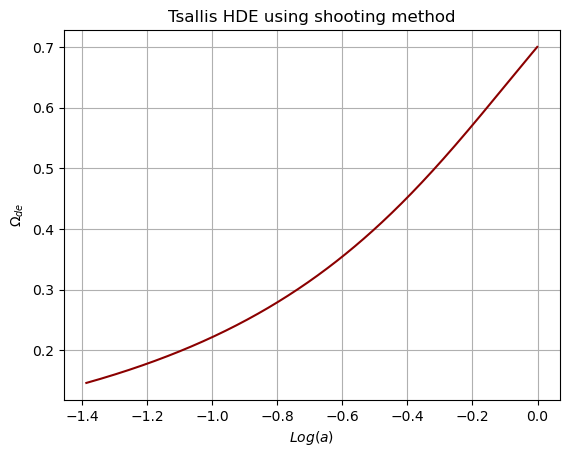

In [ ]:
# Tsallis holographic dark energy case 
B   = [0.1,0.01,0.02,0.05,0.08]
H0 = 70 
Om0 = 0.3
# we use a model with specific values 
def tsallis_model000(Omega,x,d=0.9,b1 = B[0]):
    Q = 2*(2-d)*( (b1/3)**(1./(2*(d-2))))*( H0*np.sqrt(Om0) )**((1-d)/(d-2))
    dOmega = Omega*(1-Omega)*( 2*d - 1 + Q*((1-Omega)**((1-d)/(2*(2-d))))*(Omega*(1./(2*(2-d))))*np.exp((3*(1-d)/(2*(2-d)))*x))
    return dOmega

# define the interval on Log(a)
x_loga = np.linspace(np.log(1/(1+3)), np.log(0.999), 500)

# find the root of the function 

def tsallis_root(Omega_0 , Ode0=0.7):

    result_loga_tsallis = odeint(tsallis_model000, Omega_0*10**(-5),x_loga)
    return result_loga_tsallis[-1] - Ode0

# Using the Newton method to optimize 
s = optimize.newton(tsallis_root,np.log(0.9999))
# solving again the function with the initial value found 
sol_tsallis_shooting =odeint(tsallis_model000, s*10**(-5), x_loga)

# plot the solution 
plt.plot(x_loga, sol_tsallis_shooting,color='darkred',)
print('The initial value at z=3 is ', float(sol_tsallis_shooting[0]))
plt.xlabel('$Log(a)$')
plt.ylabel('$\Omega_{de}$')
plt.title('Tsallis HDE using shooting method')
plt.grid()


### Barrow Holographic Dark Energy

The initial value at z=3 is  0.0934297165010478


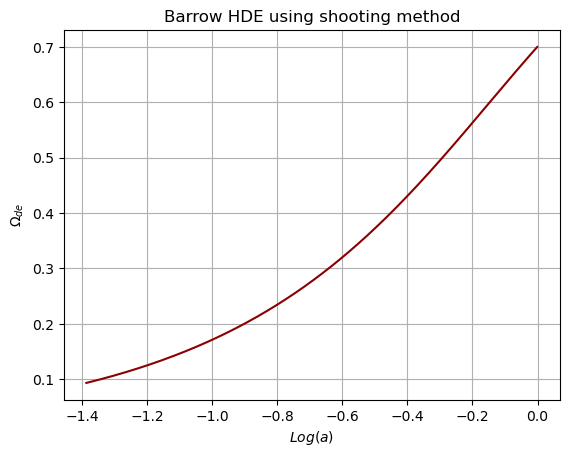

In [ ]:

# Define the Barrow model 
def barrow_model000(Omega, x, d=0.5, c=0.8):
    dOmega = Omega * (1 - Omega) * (1 + d + (2 - d) * ((Omega / c ** 2) ** (1. / (2 * d))))
    return dOmega 

# Define the interval on Log(a)
x_loga = np.linspace(np.log(1/(1+3)), np.log(0.999), 500)

# Find the root of the function 
def barrow_root(Omega_0, Ode0=0.7):
    result_loga_barrow = odeint(barrow_model000, Omega_0*10**(-5), x_loga)
    return result_loga_barrow[-1] - Ode0

# Using the Newton method to optimize 
s1 = optimize.newton(barrow_root, np.log(0.9999))

# Solving again the function with the initial value found 
sol_barrow_shooting = odeint(barrow_model000, s1*10**(-5), x_loga)

# Plot the solution 
plt.plot(x_loga, sol_barrow_shooting, color='darkred')
print('The initial value at z=3 is ', float(sol_barrow_shooting[0]))
plt.xlabel('$Log(a)$')
plt.ylabel('$\Omega_{de}$')
plt.title('Barrow HDE using shooting method')
plt.grid()
plt.show()


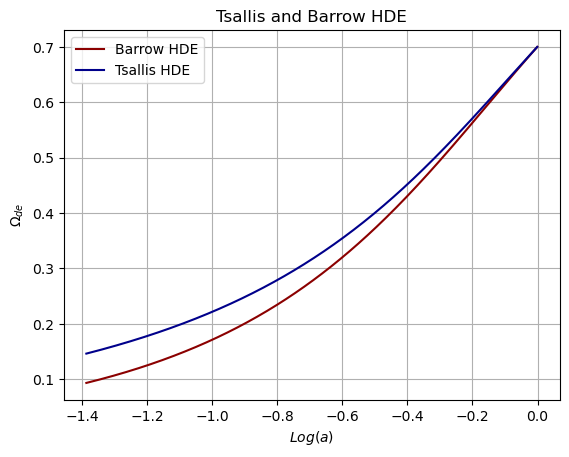

In [ ]:
plt.plot(x_loga, sol_barrow_shooting, color='darkred',label='Barrow HDE')
plt.plot(x_loga, sol_tsallis_shooting,color='darkblue',label ='Tsallis HDE')
plt.legend()
plt.xlabel('$Log(a)$')
plt.ylabel('$\Omega_{de}$')
plt.title('Tsallis and Barrow HDE')
plt.grid()
plt.show()

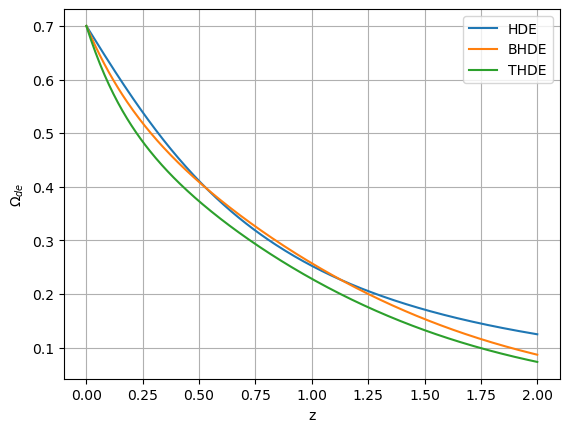

In [ ]:
Om = 0.30
c_v = 7.0
def tsallis_model_n(Omega, x, d_value=1.7, c_value= c_v):
    b = 2*(d_value -1)
    Q = (2-Omega)*((c_value**2)**(1./(b - 2)))*((70*np.sqrt(Om))**(b/(2 - b)))
    dOmega = Omega*(1-Omega)*(b + 1 + Q*((1-Omega)**(b/2*(b -2)))*(Omega**(1./(2-b)))*np.exp((3*b/(2-b))*x))
    return dOmega


def modelz_hde_n(y,z,c_value = 0.75):

    dydz = -(y*(1-y)/(1+z))*((2*(np.sqrt(y)))/c_value + 1) 
    return dydz

def barrow_model_n(Omega,x,b_value = 1.35,c_value = c_v):
    Q = (2-Omega)*((c_value**2)**(1./(b_value-2)))*((70*np.sqrt(Om))**(b_value/(2 - b_value)))
    dOmega = Omega*(1-Omega)*(b_value + 1 + Q*((1-Omega)**(b_value/2*(b_value -2)))*(Omega**(1./(2-b_value)))*np.exp((3*b_value/(2-b_value))*x))
    return dOmega

z_in = 2
z_vall = np.linspace(0,z_in,300)
x_vall = np.linspace(0,np.log(1./(1+z_in)),300)
Ode0 = 0.7
sol_hde = odeint(modelz_hde_n,Ode0,z_vall)
sol_hde_re = sol_hde.reshape(-1)

sol_ts = odeint(tsallis_model_n,Ode0,x_vall)
sol_ts_re = sol_ts.reshape(-1)

sol_ba = odeint(barrow_model_n,Ode0,x_vall)
sol_ba_re = sol_ba.reshape(-1)


plt.plot(z_vall,sol_hde_re,label='HDE')
plt.plot(z_vall,sol_ba_re,label='BHDE')
plt.plot(z_vall,sol_ts_re,label='THDE')
plt.xlabel('z')
plt.ylabel('$\Omega_{de}$')
plt.grid()
plt.legend()


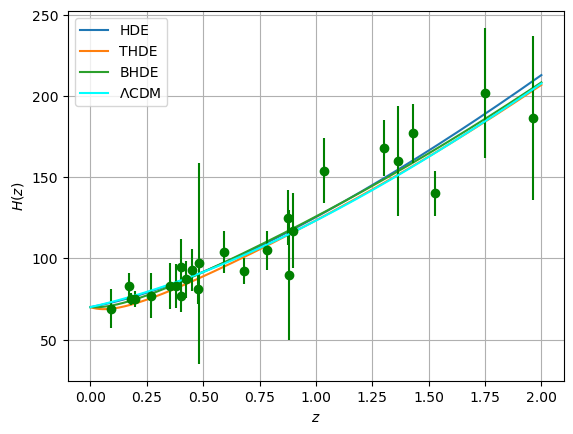

In [ ]:
def RHSquared_x(z, sol_ode):
    return H0 * np.sqrt((Om*((1+z)**3))/(1 - sol_ode))

Hubble_z_hde = RHSquared_x(z_vall, sol_hde_re)
Hubble_z_ts  = RHSquared_x(z_vall, sol_ts_re)
Hubble_z_ba  = RHSquared_x(z_vall, sol_ba_re)


plt.plot(z_vall,Hubble_z_hde,label='HDE')
plt.plot(z_vall,Hubble_z_ts,label='THDE')
plt.plot(z_vall,Hubble_z_ba,label='BHDE')
plt.errorbar(z_obs, hub_obs, error_obs, ls='', marker='o', color='green')
plt.plot(zval, hubz, color='cyan', label='$\Lambda$CDM')
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.legend()
plt.grid(True)
plt.show()